# Homework 2 - Duc Trinh 

In [1]:
import pandas as pd

In [2]:
#BeautifulSoup stuff
from urllib.request import urlopen
import bs4 

In [3]:
import json

In [4]:
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

In [5]:
import pandas as pd

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split

In [7]:
import numpy as np

In [8]:
import sys
!{sys.executable} -m pip install graphviz
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

## Exercise 1 

### a)

In [9]:
url = 'http://worldcup.sfg.io/matches'
data = urlopen(url).read().decode('utf-8')

In [10]:
worldCup = json.loads(data)

In [11]:
len(worldCup)

52

The number of matches played in the World Cup is the length of the list of dictionary we retrieved, which is 52.

### b)

In [12]:
for match in worldCup:
    print(match['home_team_country'] + " - " + match['away_team_country'] + " " + str(match['home_team']['goals']) + ":" + str(match['away_team']['goals']))

France - Korea Republic 4:0
Germany - China PR 1:0
Spain - South Africa 3:1
Norway - Nigeria 3:0
Brazil - Jamaica 3:0
England - Scotland 2:1
Australia - Italy 1:2
Argentina - Japan 0:0
Canada - Cameroon 1:0
New Zealand - Netherlands 0:1
Chile - Sweden 0:2
USA - Thailand 13:0
Nigeria - Korea Republic 2:0
Germany - Spain 1:0
France - Norway 2:1
Australia - Brazil 3:2
South Africa - China PR 0:1
Japan - Scotland 2:1
Jamaica - Italy 0:5
England - Argentina 1:0
Netherlands - Cameroon 3:1
Canada - New Zealand 2:0
Sweden - Thailand 5:1
USA - Chile 3:0
China PR - Spain 0:0
South Africa - Germany 0:4
Nigeria - France 0:1
Korea Republic - Norway 1:2
Italy - Brazil 0:1
Jamaica - Australia 1:4
Japan - England 0:2
Scotland - Argentina 3:3
Cameroon - New Zealand 2:1
Netherlands - Canada 2:1
Thailand - Chile 0:2
Sweden - USA 0:2
Germany - Nigeria 3:0
Norway - Australia 1:1
England - Cameroon 3:0
France - Brazil 2:1
Spain - USA 1:2
Sweden - Canada 1:0
Italy - China PR 2:0
Netherlands - Japan 2:1
Norwa

### c)

In [13]:
keys = ['fifa_id', 'location', 'datetime', 'home_team_country', 'away_team_country', 'winner', 'home_team_statistics', 'away_team_statistics']

In [14]:
matches = [[match[i] for i in keys] for match in worldCup] 

In [15]:
matchesFrame = pd.DataFrame(matches, columns= keys)
matchesFrame.head(5)

,fifa_id,location,datetime,home_team_country,away_team_country,winner,home_team_statistics,away_team_statistics
0,300438238,Parc des Princes,2019-06-07T19:00:00Z,France,Korea Republic,France,"{'country': 'France', 'attempts_on_goal': 21, ...","{'country': 'Korea Republic', 'attempts_on_goa..."
1,300438216,Roazhon Park,2019-06-08T13:00:00Z,Germany,China PR,Germany,"{'country': 'Germany', 'attempts_on_goal': 18,...","{'country': 'China PR', 'attempts_on_goal': 4,..."
2,300438234,Stade Océane,2019-06-08T16:00:00Z,Spain,South Africa,Spain,"{'country': 'Spain', 'attempts_on_goal': 25, '...","{'country': 'South Africa', 'attempts_on_goal'..."
3,300438213,Stade Auguste-Delaune,2019-06-08T19:00:00Z,Norway,Nigeria,Norway,"{'country': 'Norway', 'attempts_on_goal': 10, ...","{'country': 'Nigeria', 'attempts_on_goal': 9, ..."
4,300438219,Stade des Alpes,2019-06-09T13:30:00Z,Brazil,Jamaica,Brazil,"{'country': 'Brazil', 'attempts_on_goal': 18, ...","{'country': 'Jamaica', 'attempts_on_goal': 13,..."


In [16]:
matchesFrame["date"] = pd.DatetimeIndex(data = matchesFrame["datetime"]).date
matchesFrame["time"] = [(item.hour, item.minute) for item in pd.DatetimeIndex(data = matchesFrame["datetime"]).time]
matchesFrame = matchesFrame.drop("datetime",axis=1)
matchesFrame.head(5)

,fifa_id,location,home_team_country,away_team_country,winner,home_team_statistics,away_team_statistics,date,time
0,300438238,Parc des Princes,France,Korea Republic,France,"{'country': 'France', 'attempts_on_goal': 21, ...","{'country': 'Korea Republic', 'attempts_on_goa...",2019-06-07,"(19, 0)"
1,300438216,Roazhon Park,Germany,China PR,Germany,"{'country': 'Germany', 'attempts_on_goal': 18,...","{'country': 'China PR', 'attempts_on_goal': 4,...",2019-06-08,"(13, 0)"
2,300438234,Stade Océane,Spain,South Africa,Spain,"{'country': 'Spain', 'attempts_on_goal': 25, '...","{'country': 'South Africa', 'attempts_on_goal'...",2019-06-08,"(16, 0)"
3,300438213,Stade Auguste-Delaune,Norway,Nigeria,Norway,"{'country': 'Norway', 'attempts_on_goal': 10, ...","{'country': 'Nigeria', 'attempts_on_goal': 9, ...",2019-06-08,"(19, 0)"
4,300438219,Stade des Alpes,Brazil,Jamaica,Brazil,"{'country': 'Brazil', 'attempts_on_goal': 18, ...","{'country': 'Jamaica', 'attempts_on_goal': 13,...",2019-06-09,"(13, 30)"


### d)

In [17]:
stadiumDict = {}
for loc in matchesFrame["location"]:
    if loc not in stadiumDict:
        stadiumDict[loc] = 1
    else:
        stadiumDict[loc] += 1
print(stadiumDict)

{'Parc des Princes': 7, 'Roazhon Park': 7, 'Stade Océane': 7, 'Stade Auguste-Delaune': 6, 'Stade des Alpes': 5, 'Stade de Nice': 6, 'Stade du Hainaut': 6, 'Stade de la Mosson': 5, 'Stade de Lyon': 3}


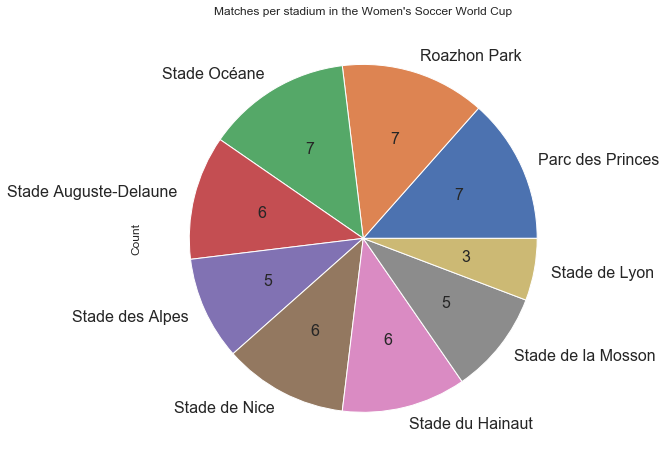

In [18]:
stadiumFrame = pd.DataFrame.from_records(data = list(stadiumDict.items()), columns = ["City","Count"])
_ = stadiumFrame.plot.pie(y = "Count", figsize=(8,8), labels = stadiumFrame["City"], autopct=lambda x: '{:.0f}'.format(x * sum(stadiumFrame["Count"]) / 100), title = "Matches per stadium in the Women's Soccer World Cup", legend = 0, fontsize = 16)

Source used to show the wedge's value: https://stackoverflow.com/questions/14171021/matplotlib-pie-chart-how-to-replace-auto-labelled-relative-values-by-absolute-v

### e)

In [19]:
keys2 = ['ball_possession', 'attempts_on_goal', 'pass_accuracy']

In [20]:
teamData = [[homeTeam[i] for i in keys2] for homeTeam in list(matchesFrame["home_team_statistics"])]
teamData += [[awayTeam[i] for i in keys2] for awayTeam in list(matchesFrame["away_team_statistics"])] 

In [21]:
teamFrame = pd.DataFrame(teamData, columns = keys2)
teamFrame = teamFrame.rename(columns = {'ball_possession':"Ball Possession", 'attempts_on_goal':'Attempts on Goal', 'pass_accuracy':'Pass Accuracy'})

In [22]:
teamFrame.head(5)

,Ball Possession,Attempts on Goal,Pass Accuracy
0,60,21,87
1,62,18,74
2,72,25,81
3,57,10,78
4,57,18,77


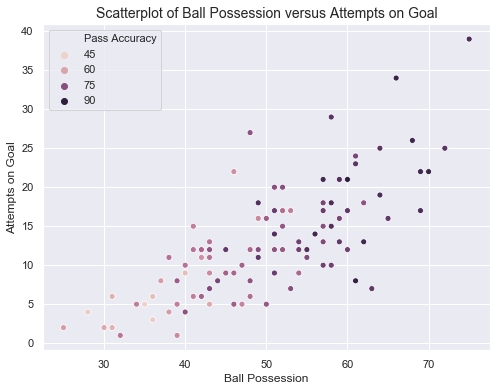

In [23]:
plt.figure(figsize = (8, 6))
plt.title(label = "Scatterplot of Ball Possession versus Attempts on Goal", fontsize = 14)
_ = sns.scatterplot(x='Ball Possession', y='Attempts on Goal', hue = 'Pass Accuracy', data=teamFrame)

From the plot, I can see a positive correlation between ball possession, attempts on goal for a team, and pass accuracy. This correlation makes sense since if a team is more skilled and has more control over the ball, they will have higher pass accuracy which would help them get a higher ball possession. More time with the ball and better pass accuracy will lead allow them more chances and time to attempt a goal which leads to an increases in attempts on goal.

## Exercise 2

### a)

In [24]:
bank_data = pd.read_csv("../Data/bank.csv", delimiter = " ", names = ['age', 'sex', 'region', 'income', 'married', 'children', 'car','save_acct', 'current_acct', 'mortgage', 'pep'])
bank_data.head(5)

,age,sex,region,income,married,children,car,save_acct,current_acct,mortgage,pep
0,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [25]:
numeric_data = bank_data.replace(['NO', 'YES', 'MALE', 'FEMALE'],[0,1,0,1])
numeric_data = numeric_data.values

features = np.zeros((len(numeric_data),4))
numeric_data = np.append(numeric_data,features,1)
j = 2
for i in range(len(numeric_data)):
    if numeric_data[i][j] == 'INNER_CITY':
        numeric_data[i][11:15] = [1,0,0,0]
    if numeric_data[i][j] == 'TOWN':
         numeric_data[i][11:15] = [0,1,0,0]
    if numeric_data[i][j] == 'RURAL':
         numeric_data[i][11:15] = [0,0,1,0]
    if numeric_data[i][j] == 'SUBURBAN':
         numeric_data[i][11:15] = [0,0,0,1]        
#remove redundant column
numeric_data = np.delete(numeric_data, 2, 1)
numeric_data.astype(float)

bank_labels = numeric_data[:, 9].astype(int)
bank_attrs  = np.delete(numeric_data, 9, 1)

In [26]:
bank_features_train, bank_features_test, bank_labels_train, bank_labels_test = train_test_split(bank_attrs, bank_labels, test_size=0.33, random_state=42)

In [27]:
decisionTree = DecisionTreeClassifier(max_depth = 6)
decisionTree.fit(bank_features_train, bank_labels_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [28]:
predictions_test = decisionTree.predict(bank_features_test)

In [29]:
cm = metrics.confusion_matrix(bank_labels_test,predictions_test)
print(cm)

[[87 11]
 [15 85]]


In [30]:
print("Precision: ", metrics.precision_score(bank_labels_test,predictions_test))
print("Recall: ", metrics.recall_score(bank_labels_test,predictions_test))
print("Accuracy: ", metrics.accuracy_score(bank_labels_test,predictions_test))

Precision:  0.8854166666666666
Recall:  0.85
Accuracy:  0.8686868686868687


### b) 

In [31]:
tree1_prob = decisionTree.predict_proba(bank_features_test)
fpr, tpr, thresholds = metrics.roc_curve(bank_labels_test, tree1_prob[:,1], pos_label=1, sample_weight=None)

In [32]:
metrics.roc_auc_score(bank_labels_test,tree1_prob[:,1], average='macro', sample_weight=None)

0.8692857142857142

In [33]:
decisionTree2 = DecisionTreeClassifier(max_depth = 10, max_leaf_nodes = 10)
decisionTree2.fit(bank_features_train, bank_labels_train)
tree2_prob = decisionTree2.predict_proba(bank_features_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(bank_labels_test, tree2_prob[:,1], pos_label=1, sample_weight=None)

In [34]:
metrics.roc_auc_score(bank_labels_test,tree2_prob[:,1], average='macro', sample_weight=None)

0.8571938775510204

(0, 1)

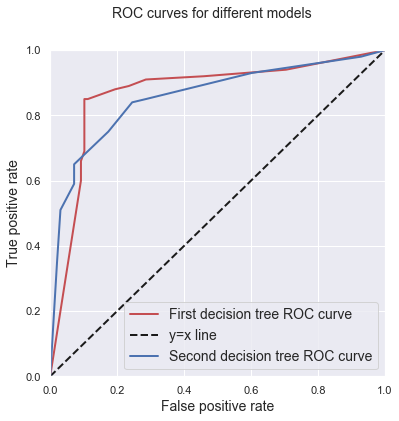

In [35]:
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,'-r',linewidth=2.0, label = "First decision tree ROC curve")
straightLine = np.linspace(0,1,100)
plt.plot(straightLine, straightLine, '--k', linewidth=2.0, label = "y=x line")
plt.plot(fpr2,tpr2,'-b',linewidth=2.0, label = "Second decision tree ROC curve")
plt.xlabel('False positive rate', fontsize = 14)
plt.ylabel('True positive rate',fontsize = 14)
plt.legend(loc='lower right', fontsize = 14)
plt.suptitle('ROC curves for different models', fontsize=14)
plt.xlim([0,1])
plt.ylim([0,1])

### c)

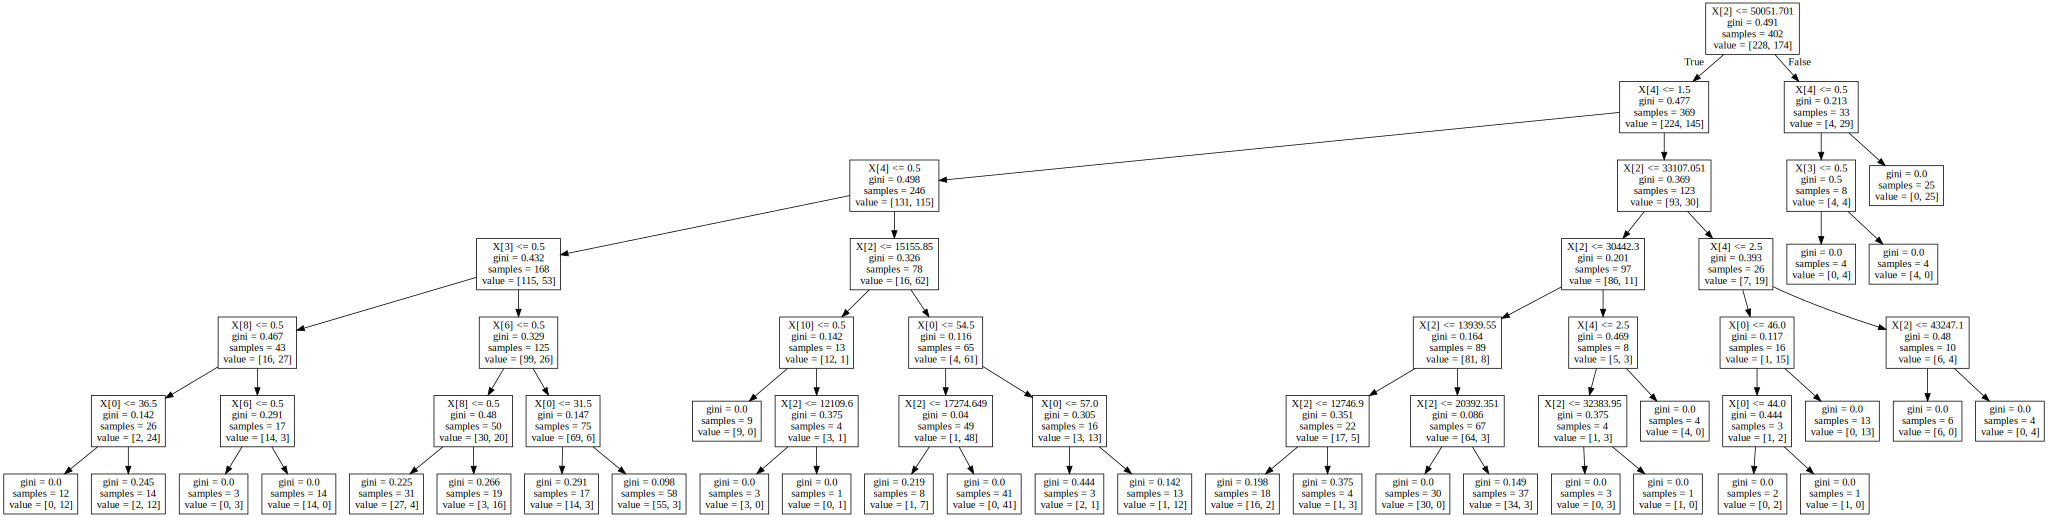

In [36]:
graphviz.Source(source = tree.export_graphviz(decisionTree))

In [37]:
#The columns in order are: 'age', 'sex', 'income', 'married', 'children', 'car','save_acct', 'current_acct', 'mortgage', 10:14 is one hot encoding for 'region'

We splitted on income first. The usual splitting attributes are: income, children, and age. Note that we are trying to predict PEP (whether the person bought a Personal Equity Plan after the last mailing). 

I think that these results show the important things to focus on if the bank is trying to get more people to purchase their PEP. Since this is a financial decision, I was not suprised to see "income" was the attribute being used the most as well as it being the first split in the tree. "Number of children" being the second most splitted attributes along with the fact that the "marriage status" attribute was also being used quite frequently combined together suggest that this is also something to look out for. Perharps people who have to support their family will look more into personal investment hence having a higher chance of purchasing PEP. The attribute "age" also being a common one might be suggesting an investing pattern (maybe old people tend to be more financially responsible and the fact that they actually have money to invest will lead to them purchasing more PEP?).